# What is the most optimal skill to learn for Data Analysts?

**Methodology**
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

## Importing Libraries and Data

Importing the libraries, data, and change the `job_posted_date` to a datetime type.

In [2]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

c:\Users\jaken\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Clean Data

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'United States', to create a new DataFrame `df_DA_US`. Drop NAN values from the 'salary_year_avg' column. Then it uses the `explode` method on the `job_skills` column to create a new row in a new DataFrame (`df_DA_US_exploded`) for each skill associated with a job. Finally, it displays the first 5 entries of the `salary_year_avg` and `job_skills` columns.

In [13]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Calculte Percent of Job Postings that Have Skills

Group the data by job skills and calculates the count and median salary for each skill, sorting the results in descending order by count. It then renames the columns and calculates the percentage that each skill count represents out of the total number of Data Analyst jobs. Finally, it filters out any skills that don't have any jobs associated with them and skills that exceed a certain percentage (`skill_percent`)

In [4]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent']> skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


## Median Salary vs Percent Skill Demand

Create a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.

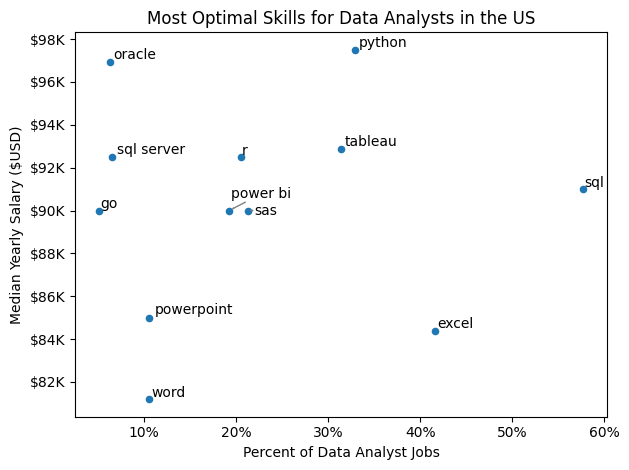

In [5]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter((PercentFormatter(decimals=0)))

plt.tight_layout()
plt.show()

## Coloring by Technology

We're going to add color labels based on technology

Removes duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing the values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and back into a list. The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [6]:
df_technology = df['job_type_skills'].copy()

#Remove duplicates
df_technology = df_technology.drop_duplicates()

#Remove NaN values
df_technology = df_technology.dropna()

#Combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  #Convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  #If key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       #If key does not exist in technology_dict, add key and value
            technology_dict[key] = value

#Remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['cognos',
  'ssrs',
  'nuix',
  'msaccess',
  'esquisse',
  'visio',
  'powerpoint',
  'spreadsheet',
  'word',
  'alteryx',
  'power bi',
  'sheets',
  'sap',
  'looker',
  'spss',
  'ssis',
  'powerbi',
  'outlook',
  'microstrategy',
  'qlik',
  'dax',
  'ms access',
  'datarobot',
  'splunk',
  'sas',
  'excel',
  'tableau',
  'sharepoint'],
 'programming': ['mongodb',
  'ruby',
  'f#',
  'clojure',
  'solidity',
  'lisp',
  'typescript',
  'sql',
  'haskell',
  'mongo',
  'lua',
  'matlab',
  'html',
  'php',
  'shell',
  'delphi',
  'apl',
  'objective-c',
  'groovy',
  'cobol',
  'powershell',
  'go',
  'golang',
  'c#',
  'fortran',
  'sass',
  'erlang',
  'java',
  'elixir',
  'vb.net',
  'perl',
  'scala',
  'c',
  'css',
  'nosql',
  'javascript',
  'pascal',
  'ocaml',
  'swift',
  'sas',
  't-sql',
  'julia',
  'rust',
  'vba',
  'visual basic',
  'assembly',
  'python',
  'visualbasic',
  'crystal',
  'bash',
  'c++',
  'kotlin',
  'no-sql',
  'dart',
 

This code converts the dictionary into a pandas DataFrame, then explodes the 'skills' column, creating multiple rows for each 'technology' entry if it contains multiple skills.

In [7]:
#Turn dictionary into a dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,cognos
0,analyst_tools,ssrs
0,analyst_tools,nuix
0,analyst_tools,msaccess
0,analyst_tools,esquisse
...,...,...
9,sync,symphony
9,sync,ringcentral
9,sync,google chat
9,sync,twilio


Merges two DataFrames `df_DA_skills` and `df_technology`, based on the columns 'job_skills', and 'skills' respectively, creating a new DataFrame `df_DA_skills_tech`

In [8]:
#Merge df_DA_skills and df_technology

df_DA_skills_tech = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


Plot the results in a scatter plot, filtering out select rows where the 'percent' column exceeds a specific threshold, and coloring the points based on the 'technology' column.

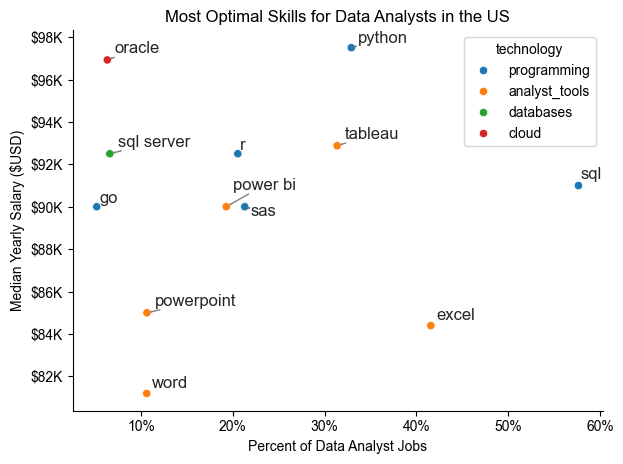

In [9]:
from adjustText import adjust_text

sns.scatterplot(
    data=df_DA_skills_tech, 
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'), expand=(1.2, 1.4))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter((PercentFormatter(decimals=0)))

plt.tight_layout()
plt.show()